# Unit 5 - Financial Planning

In [17]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [18]:
#Setting path for .emv file
from pathlib import Path
dotenv_path = Path('API_Keys/.env')

In [19]:
# Load .env enviroment variables
load_dotenv(dotenv_path = dotenv_path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [20]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [21]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [22]:
# Fetch current BTC price
btc_current_price = requests.get(btc_url).json()
btc_current_price 


{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18996137,
   'total_supply': 18996137,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 47277.0,
     'volume_24h': 29096534691,
     'market_cap': 898088179648,
     'percentage_change_1h': 0.48924700047099,
     'percentage_change_24h': 6.13648257373308,
     'percentage_change_7d': 14.519571170098,
     'percent_change_1h': 0.48924700047099,
     'percent_change_24h': 6.13648257373308,
     'percent_change_7d': 14.519571170098},
    'CAD': {'price': 59067.8838,
     'volume_24h': 36353210442.9354,
     'market_cap': 1122071371652.21,
     'percent_change_1h': 0.48924700047099,
     'percent_change_24h': 6.13648257373308,
     'percent_change_7d': 14.519571170098}},
   'last_updated': 1648469364}},
 'metadata': {'timestamp': 1648469364,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [23]:
#Parse JSON and extract BTC current price in CAD dollar
btc_current_price = btc_current_price['data']['1']['quotes']['CAD']['price']
btc_current_price

59067.8838

In [24]:
# Fetch current ETH price
eth_current_price = requests.get(eth_url).json()
eth_current_price

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120145281,
   'total_supply': 120145281,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3347.55,
     'volume_24h': 15824073244,
     'market_cap': 401296875229,
     'percentage_change_1h': 0.376836462711466,
     'percentage_change_24h': 6.44296118511161,
     'percentage_change_7d': 17.0211055654702,
     'percent_change_1h': 0.376836462711466,
     'percent_change_24h': 6.44296118511161,
     'percent_change_7d': 17.0211055654702},
    'CAD': {'price': 4182.42897,
     'volume_24h': 19770597111.0536,
     'market_cap': 501380315911.113,
     'percent_change_1h': 0.376836462711466,
     'percent_change_24h': 6.44296118511161,
     'percent_change_7d': 17.0211055654702}},
   'last_updated': 1648469259}},
 'metadata': {'timestamp': 1648469259,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [25]:
# Fetch current ETH price
eth_current_price = requests.get(eth_url).json()
eth_current_price

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120145281,
   'total_supply': 120145281,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3347.55,
     'volume_24h': 15824073244,
     'market_cap': 401296875229,
     'percentage_change_1h': 0.376836462711466,
     'percentage_change_24h': 6.44296118511161,
     'percentage_change_7d': 17.0211055654702,
     'percent_change_1h': 0.376836462711466,
     'percent_change_24h': 6.44296118511161,
     'percent_change_7d': 17.0211055654702},
    'CAD': {'price': 4182.42897,
     'volume_24h': 19770597111.0536,
     'market_cap': 501380315911.113,
     'percent_change_1h': 0.376836462711466,
     'percent_change_24h': 6.44296118511161,
     'percent_change_7d': 17.0211055654702}},
   'last_updated': 1648469259}},
 'metadata': {'timestamp': 1648469259,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [26]:
#Parse JSON and extract BTC current price in CAD dollar
eth_current_price = eth_current_price['data']['1027']['quotes']['CAD']['price']
eth_current_price

4182.42897

In [27]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $70881.46
The current value of your 5.3 ETH is $22166.87


In [28]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $70881.46
The current value of your 5.3 ETH is $22166.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [30]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')



In [31]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [32]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [33]:
# Format current date as ISO format
today = pd.Timestamp("2022-03-24",tz="America/New_York").isoformat() 

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = tradeapi.TimeFrame.Day

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_share_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

#Drop the time component of the date

# Preview DataFrame
df_share_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-24 04:00:00+00:00,106.72,107.035,106.65,106.95,7378690,23320,106.879605,AGG
2022-03-24 04:00:00+00:00,445.82,450.500,444.76,450.48,61411569,526865,447.609014,SPY


In [34]:
# Pick AGG close prices
agg_close_price = df_share_portfolio.iloc[0][3]
agg_close_price
# agg_close_price = df_share_portfolio.loc[df_share_portfolio['symbol'] == 'AGG',['close']]
# agg_close_price.rename(columns={'close':'AGG Close Price'})

106.95

In [35]:
# Pick SPY close prices
spy_close_price = df_share_portfolio.iloc[1][3]
spy_close_price
# spy_close_price = df_share_portfolio.loc[df_share_portfolio['symbol'] == 'SPY',['close']]
# spy_close_price.rename(columns={'close':'SPY Close Price'})

450.48

In [36]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.95
Current SPY closing price: $450.48


In [37]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22524.00
The current value of your 200 AGG shares is $21390.00


### Savings Health Analysis

In [38]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_agg_value + my_spy_value

In [39]:
# Create savings DataFrame
savings = {'Asset Class':['crypto','shares'], 'Amount':[total_crypto,total_shares]}
df_savings = pd.DataFrame(savings).set_index('Asset Class')
# Display savings DataFrame
display(df_savings)

,Amount
Asset Class,
crypto,93048.334101
shares,43914.000000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='Amount'>

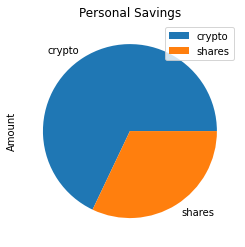

In [40]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title='Personal Savings')

In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif emergency_fund == total_savings:
    print('Congratulations! You have reached your financial goal.')
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your financial goal')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-24', tz='America/New_York').isoformat()

In [43]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 2000
).df

# Display sample data
df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-24 04:00:00+00:00,108.35,108.5100,108.3100,108.36,3374871,11229,108.398485,AGG
2017-03-27 04:00:00+00:00,108.65,108.7100,108.5345,108.62,1977292,11112,108.600681,AGG
2017-03-28 04:00:00+00:00,108.63,108.6800,108.3500,108.37,2016097,9144,108.514754,AGG
2017-03-29 04:00:00+00:00,108.48,108.6200,108.4600,108.61,1965626,10135,108.539517,AGG
2017-03-30 04:00:00+00:00,108.52,108.5800,108.3800,108.41,1733874,8188,108.440472,AGG
...,...,...,...,...,...,...,...,...
2020-02-26 05:00:00+00:00,314.19,318.1100,310.7000,311.50,195022730,1374137,313.607495,SPY
2020-02-27 05:00:00+00:00,305.45,311.5637,297.5100,297.51,287045452,2154934,304.182190,SPY
2020-02-28 05:00:00+00:00,288.62,297.8920,285.5400,296.26,389756653,2687374,292.306901,SPY


In [44]:
# Reformat dataframe for MCS
def format_MCSimulation(df_stock_data):
    ticker_list = df_stock_data['symbol'].unique()
    df_ = pd.DataFrame()
    for ticker in ticker_list:
        df_stockdata = df_stock_data[df_stock_data['symbol'] == ticker]
        df_stockdata.columns = pd.MultiIndex.from_product([[ticker],df_stock_data.columns])
        if df_.empty:
            df_ = df_stockdata
        else:
            df_ = pd.concat([df_,
                            df_stockdata],
                            axis = 1,
                            join='inner')

    return df_

df_stockdata = format_MCSimulation(df_stock_data)
df_stockdata.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   

                                                             SPY          \
                          trade_count        vwap symbol    open    high   
timestamp                                                                  
2017-03-24 04:00:00+00:00       11229  108.398485    AGG  234.35  235.04   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG  231.97  233.92   
2017-03-28 04:00:00+00:00        9144  108.514754    AGG  233.32  235.81   
2017-03-29 04:00:00+00:00       10135  108.539517    AGG  235.00  235.81   
2017-03-30 04:00:00+00:00        8188  108.440472    AGG  235.50  236.52   

                                                                               \
                               low   close     volume trade_count        vwap   
timestamp                                                                       
2017-03-24 04:00:00+00:00  232.960  233.86  112504853      359600  234.080978   
2017-03-27 04:00:00+00:00  231.610  233.62   87454452      289784  233.041576   
2017-03-28 04:00:00+00:00  233.140  235.32   93483915      277352  234.596748   
2017-03-29 04:00:00+00:00  234.725  235.54   61950354      194177  235.429910   
2017-03-30 04:00:00+00:00  235.270  236.29   56737890      180049  236.126775   

                                  
                          symbol  
timestamp                         
2017-03-24 04:00:00+00:00    SPY  
2017-03-27 04:00:00+00:00    SPY  
2017-03-28 04:00:00+00:00    SPY  
2017-03-29 04:00:00+00:00    SPY  
2017-03-30 04:00:00+00:00    SPY

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stockdata,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [46]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   
2017-03-28 04:00:00+00:00  108.63  108.68  108.3500  108.37  2016097   
2017-03-29 04:00:00+00:00  108.48  108.62  108.4600  108.61  1965626   
2017-03-30 04:00:00+00:00  108.52  108.58  108.3800  108.41  1733874   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2017-03-24 04:00:00+00:00       11229  108.398485    AGG          NaN  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681    AGG     0.002399  231.97   
2017-03-28 04:00:00+00:00        9144  108.514754    AGG    -0.002302  233.32   
2017-03-29 04:00:00+00:00       10135  108.539517    AGG     0.002215  235.00   
2017-03-30 04:00:00+00:00        8188  108.440472    AGG    -0.001841  235.50   

                                                                           \
                             high      low   close     volume trade_count   
timestamp                                                                   
2017-03-24 04:00:00+00:00  235.04  232.960  233.86  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.610  233.62   87454452      289784   
2017-03-28 04:00:00+00:00  235.81  233.140  235.32   93483915      277352   
2017-03-29 04:00:00+00:00  235.81  234.725  235.54   61950354      194177   
2017-03-30 04:00:00+00:00  236.52  235.270  236.29   56737890      180049   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2017-03-24 04:00:00+00:00  234.080978    SPY          NaN  
2017-03-27 04:00:00+00:00  233.041576    SPY    -0.001026  
2017-03-28 04:00:00+00:00  234.596748    SPY     0.007277  
2017-03-29 04:00:00+00:00  235.429910    SPY     0.000935  
2017-03-30 04:00:00+00:00  236.126775    SPY     0.003184

In [47]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Wai Fatt Yee\Course_Work\APIs-homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006201,1.010464,0.998865,1.003731,1.001263,1.006971,1.000354,0.998352,0.993391,1.000975,...,1.007550,0.998525,1.004255,1.004172,0.998691,1.015406,1.012768,0.997328,1.001819,1.002976
2,1.011850,1.016025,1.001336,0.995384,1.003340,0.995537,1.003129,0.999118,0.995065,0.998136,...,1.013486,0.991337,1.004059,1.004652,1.000043,1.019670,1.009463,0.992882,0.995296,1.003986
3,1.008888,1.015379,0.991876,1.006733,1.006984,0.999922,0.998648,1.000932,0.996498,0.985474,...,1.011260,0.989693,1.009649,1.003073,0.998059,1.021332,1.004046,0.994159,0.998415,1.007393
4,1.003899,1.014558,0.996371,1.017109,0.999865,0.995515,1.002774,1.010561,0.996406,0.982459,...,1.014573,0.983513,1.009004,0.995632,0.997680,1.011410,1.000136,0.992043,1.002574,1.006828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.684967,4.108604,12.393765,3.993638,6.301048,9.317028,9.065987,8.232437,7.093532,12.390822,...,4.347457,8.096202,6.124468,3.794927,7.283907,6.288355,6.684141,14.188479,6.310926,8.404739
7557,5.678054,4.109953,12.399969,3.958091,6.272940,9.345865,9.058428,8.226289,7.111604,12.391870,...,4.371622,8.130716,6.121483,3.787780,7.288043,6.283901,6.664000,14.198197,6.280200,8.388008
7558,5.635047,4.086608,12.392752,3.907433,6.294148,9.318304,9.108226,8.285754,7.153851,12.434140,...,4.360378,8.064385,6.084133,3.761034,7.265522,6.296575,6.635104,14.193257,6.281056,8.423094
7559,5.613527,4.103003,12.410826,3.921164,6.272897,9.273127,9.110295,8.303135,7.147079,12.463374,...,4.378041,8.063619,6.039600,3.737866,7.288475,6.278926,6.633795,14.128996,6.238918,8.444664


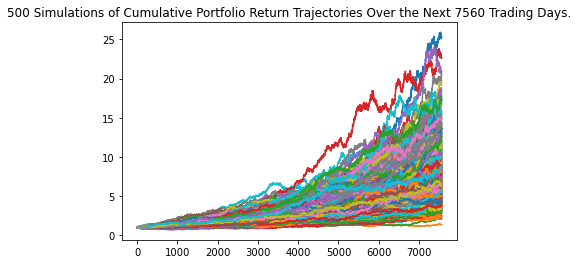

In [48]:
# Plot simulation outcomes
line_plot=MC_thirty_year.plot_simulation()

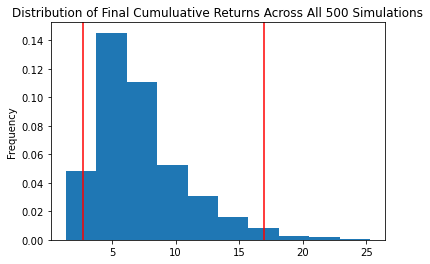

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(stats)

count           500.000000
mean              7.261531
std               3.566246
min               1.365660
25%               4.763512
50%               6.337330
75%               8.723834
max              25.305076
95% CI Lower      2.757580
95% CI Upper     16.976974
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [51]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $55151.6 and $339539.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [52]:
# Set initial investment
initial_investment1 = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment1,2)
ci_upper = round(stats[9]*initial_investment1,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $82727.4 and $509309.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [53]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stockdata,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [54]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Wai Fatt Yee\Course_Work\APIs-homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006615,1.003599,1.007351,1.003399,0.996091,0.998634,1.003197,0.989801,0.991198,0.999263,...,0.996315,1.010148,1.006466,0.998101,0.999948,1.001399,0.989294,1.003787,1.005108,0.988341
2,1.007784,1.001979,0.999497,1.003240,0.996280,0.997423,1.005162,0.982690,1.007302,1.000997,...,0.996397,1.015722,1.004737,1.009482,0.999813,0.998093,0.989698,1.008318,1.011312,0.983656
3,1.009213,0.999007,0.992380,1.000090,1.001146,1.002828,1.001711,0.985794,1.006466,1.003316,...,0.995283,1.018332,1.012639,1.015778,1.001775,0.994895,0.995630,1.012711,1.018931,0.988132
4,1.013825,1.001513,0.995698,1.001292,1.006570,1.007136,1.003630,0.985706,1.003526,0.997059,...,0.998201,1.018298,1.015496,1.019136,1.003299,0.996490,0.994218,1.013163,1.029325,0.991737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.395223,1.980720,0.958974,1.240897,1.117661,1.496762,1.679198,1.361526,1.193373,1.754585,...,1.446530,1.102943,1.286975,1.321391,1.812540,1.344559,1.597897,1.548782,1.981340,1.135498
1257,1.402742,1.963707,0.959979,1.244457,1.122237,1.496817,1.687161,1.355458,1.207060,1.746246,...,1.451313,1.100185,1.295943,1.308617,1.816257,1.347770,1.576549,1.551428,2.014082,1.144309
1258,1.408844,1.964460,0.957371,1.238914,1.124638,1.486350,1.688817,1.346613,1.203895,1.734664,...,1.453818,1.095647,1.289137,1.310621,1.819208,1.348427,1.577890,1.548261,1.989240,1.144394
1259,1.410317,1.954176,0.950175,1.241992,1.122930,1.485547,1.679967,1.346691,1.197718,1.739949,...,1.452876,1.095959,1.285585,1.305154,1.815028,1.343349,1.568756,1.560342,1.995873,1.135783


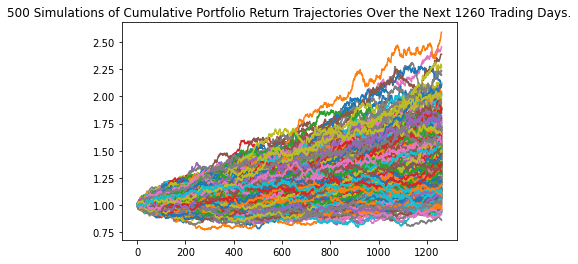

In [55]:
# Plot simulation outcomes
line_plot5=MC_five_year.plot_simulation()

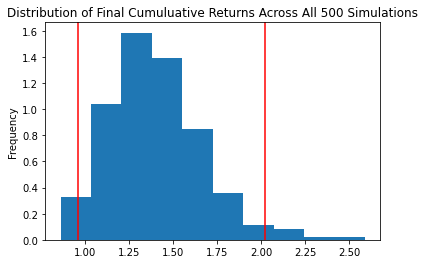

In [56]:
# Plot probability distribution and confidence intervals
dist_plot5 = MC_five_year.plot_distribution()

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_5 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(stats_5)

count           500.000000
mean              1.404338
std               0.267939
min               0.861134
25%               1.214600
50%               1.371558
75%               1.552115
max               2.589538
95% CI Lower      0.961895
95% CI Upper      2.024483
Name: 1260, dtype: float64


In [58]:
# Set initial investment
initial_investment2 = 120000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $120,000
ci_lower_five = round(stats_5[8]*initial_investment2,2)
ci_upper_five = round(stats_5[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $120000 in the portfolio over the next 5 years will end within in the range of $115427.4 and $242937.96


### Ten Years Retirement Option

In [59]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stockdata,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [60]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Wai Fatt Yee\Course_Work\APIs-homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997322,1.011064,1.006654,1.003057,0.995260,1.008946,0.992197,0.996016,1.004923,1.012403,...,1.000545,1.004582,0.992271,1.001695,1.009792,1.001979,1.004140,1.010197,0.997931,0.994968
2,0.997891,1.009152,0.995873,1.007797,1.001064,1.006975,0.989046,0.991400,1.011395,1.020978,...,1.002710,1.002443,1.003043,0.994461,1.006875,1.008816,0.999120,1.009949,1.001065,1.001271
3,1.002605,1.009314,0.990895,1.001994,0.998419,1.012888,0.994266,1.000309,1.007985,1.032608,...,1.007147,1.000592,1.005393,0.996884,1.006735,1.012363,1.007370,1.009695,0.995892,0.997053
4,1.000267,1.008907,0.993639,1.006816,1.002559,1.008908,0.991163,0.999688,1.013479,1.034870,...,1.009543,0.995946,1.005675,1.009959,1.002630,1.007749,1.010593,1.012242,0.997509,0.989167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.120052,2.633203,2.115307,1.442386,1.660031,1.744802,2.461242,1.650027,1.804726,2.640444,...,2.514800,4.067198,1.466461,1.506546,2.300888,1.382714,2.827000,1.613539,1.324853,1.699476
2517,2.131751,2.632676,2.105361,1.445286,1.657049,1.746286,2.460040,1.654215,1.800086,2.638528,...,2.536483,4.069661,1.462414,1.495190,2.298278,1.375964,2.848878,1.624508,1.331103,1.699352
2518,2.139028,2.631428,2.103296,1.438560,1.642952,1.747658,2.462982,1.661711,1.808870,2.643472,...,2.557093,4.058230,1.454523,1.478826,2.305714,1.371093,2.843049,1.616583,1.333960,1.688663
2519,2.132712,2.606085,2.086660,1.441473,1.647850,1.744161,2.453923,1.650998,1.792175,2.645326,...,2.541391,4.061008,1.477157,1.477679,2.311479,1.372802,2.826459,1.610785,1.334463,1.693964


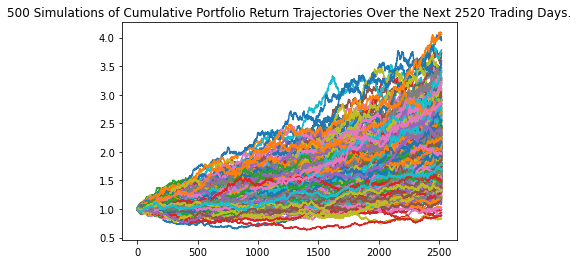

In [61]:
# Plot simulation outcomes
line_plot10=MC_ten_year.plot_simulation()

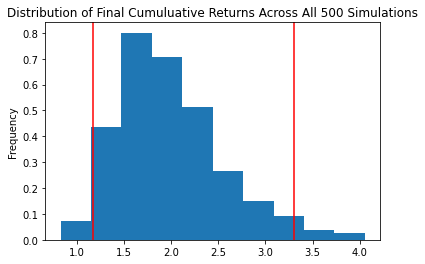

In [62]:
# Plot probability distribution and confidence intervals
dist_plot10 = MC_ten_year.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
stats_10 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(stats_10)

count           500.000000
mean              1.996219
std               0.558428
min               0.830329
25%               1.583491
50%               1.917683
75%               2.325359
max               4.054224
95% CI Lower      1.169089
95% CI Upper      3.299551
Name: 2520, dtype: float64


In [64]:
# Set initial investment
initial_investment3 = 70000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $70,000
ci_lower_ten = round(stats_10[8]*initial_investment3,2)
ci_upper_ten = round(stats_10[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $70000 in the portfolio over the next 10 years will end within in the range of $81836.25 and $230968.59
